<a href="https://colab.research.google.com/github/Roumyajit/My-Project-Data-Science/blob/main/Copy_of_IPL_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Deliveries columns: ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder']
Matches columns: ['id', 'season', 'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'target_runs', 'target_overs', 'super_over', 'method', 'umpire1', 'umpire2']


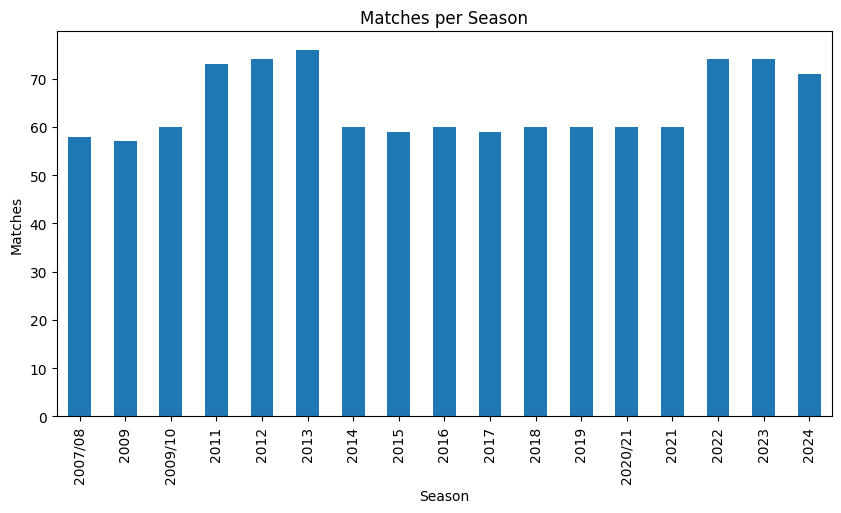

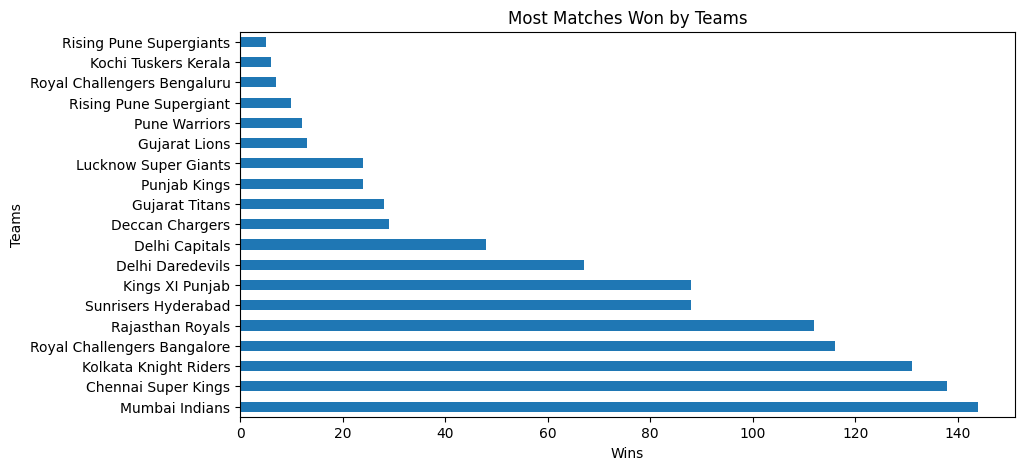

Columns 'batsman' or 'batsman_runs' not found!


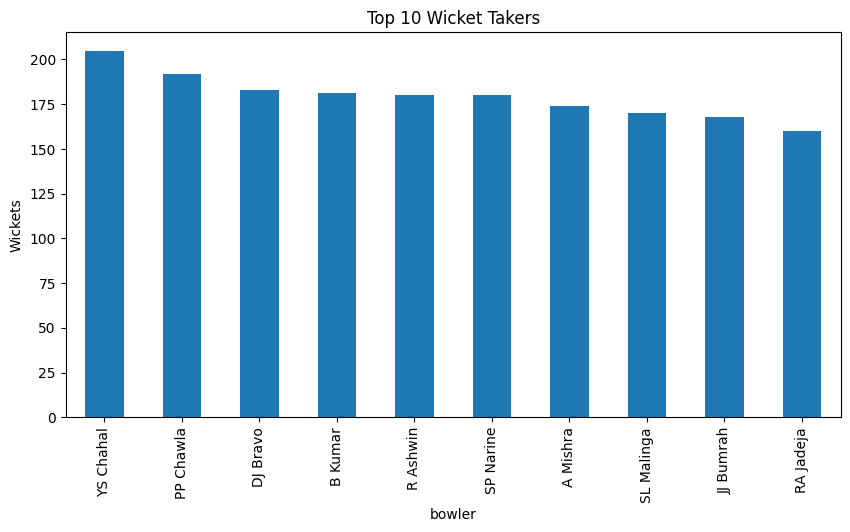

Toss winner also won match in 50.59% cases


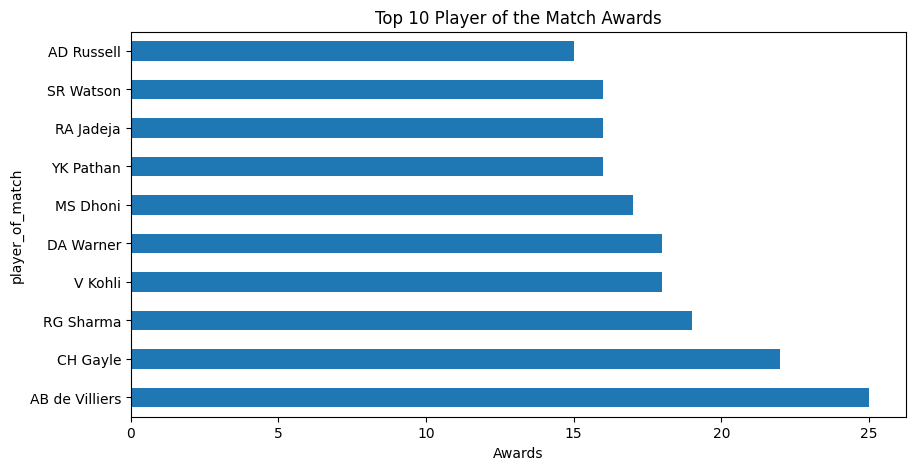

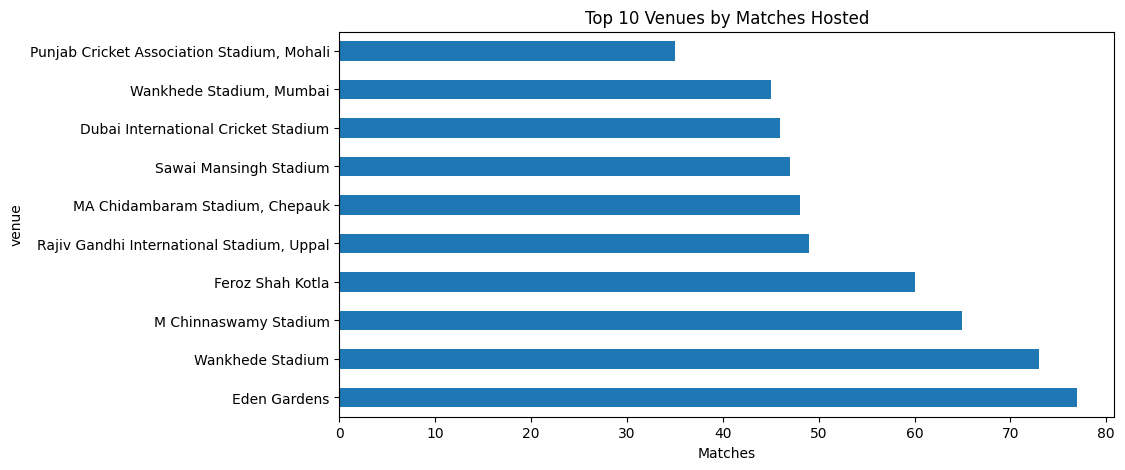

In [ ]:
# Dataset Load
matches = pd.read_csv('/content/matches.csv')
deliveries = pd.read_csv('/content/deliveries.csv')

# Clean column names (remove spaces)
deliveries.columns = deliveries.columns.str.strip()
matches.columns = matches.columns.str.strip()

# Check columns list
print("Deliveries columns:", deliveries.columns.tolist())
print("Matches columns:", matches.columns.tolist())

# Total matches per season
season_matches = matches['season'].value_counts().sort_index()
season_matches.plot(kind='bar', figsize=(10,5), title='Matches per Season')
plt.xlabel('Season')
plt.ylabel('Matches')
plt.show()

# Most matches won by teams
team_wins = matches['winner'].value_counts()
team_wins.plot(kind='barh', figsize=(10,5), title='Most Matches Won by Teams')
plt.xlabel('Wins')
plt.ylabel('Teams')
plt.show()

# Top 10 run scorers
if 'batsman' in deliveries.columns and 'batsman_runs' in deliveries.columns:
    top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
    top_batsmen.plot(kind='bar', figsize=(10,5), title='Top 10 Run Scorers')
    plt.ylabel('Total Runs')
    plt.show()
else:
    print("Columns 'batsman' or 'batsman_runs' not found!")

# Top 10 wicket takers
dismissal_types = ['bowled','caught','lbw','stumped','caught and bowled']
wickets = deliveries[deliveries['dismissal_kind'].isin(dismissal_types)]

if 'bowler' in wickets.columns:
    top_bowlers = wickets.groupby('bowler').count()['dismissal_kind'].sort_values(ascending=False).head(10)
    top_bowlers.plot(kind='bar', figsize=(10,5), title='Top 10 Wicket Takers')
    plt.ylabel('Wickets')
    plt.show()
else:
    print("Column 'bowler' not found!")

# Toss winner vs Match winner
toss_match_winner = matches[matches['toss_winner'] == matches['winner']]
percentage = (len(toss_match_winner) / len(matches)) * 100
print(f"Toss winner also won match in {percentage:.2f}% cases")

# Most Player of the Match awards
pom = matches['player_of_match'].value_counts().head(10)
pom.plot(kind='barh', figsize=(10,5), title='Top 10 Player of the Match Awards')
plt.xlabel('Awards')
plt.show()

# Venue-wise match count
venue_matches = matches['venue'].value_counts().head(10)
venue_matches.plot(kind='barh', figsize=(10,5), title='Top 10 Venues by Matches Hosted')
plt.xlabel('Matches')
plt.show()